<!-- dom:TITLE: Pythin leter etter kvadratrot   -->
# Python leter etter kvadratrøtter
<!-- dom:AUTHOR: A. Schmeding -->
<!-- Author: -->  
**Alexander Schmeding**

Date: **Jan, 2022**

# Innledning

Vi skal lære å programmere men for dette trenger vi noen problemer vi er (kanskje) interessert i og som kan løses ved bruk av datamaskinen. Vi skal bruke programmvare for å finne oss kvadratrøtter av tall.
Husk at 

en *kvadratrot* av ett tall $a$ er ett tall $b$ slik at 
$$b^2 = a \qquad \text{ vanligvis skriver vi da } b = \sqrt{a}.$$

Enkle eksempler er $\sqrt{1}=1$, $\sqrt{4}=2$ og $\sqrt{9}=3, ...$.

Men hva med $\sqrt{2}$? 

Vi vet at $1^2 = 1 < 2 < 4=2^2$. La oss prøve med noen tall i kalkulator:

In [ ]:
#La oss prøve å finne ut hva kvadratroten av 2 er. Vi prøver å kvadrere noen tall:
1.1**2                         #Husk syntaks for potens i Python **!!
1.2**2
1.3**2
1.4**2
1.5**2                        

Det blir fort slitsom å lete etter rota ved gjetting, la oss bruke kalkulatorfunksjonen av Python for å finne en løsning

In [ ]:
from pylab import *                #Python vet ingenting om kvadratrot men pylab har funksjon sqrt

a= sqrt(2)                         #vi beregner kvadratrot ved hjelp av sqrt (engelsk: squareroot)
print(a)

#a**2

## Datamaskiner regner annerledes 

Vi som menesker kan løse en likning som 
$$x^2 = 2 \text{ eksakt som } x= \pm \sqrt{2}.$$
Men $\sqrt{2} = 1.414213...$ er ett tall med uendelig mange ulike og uregelmessige desimaler etter kommaen (dvs. $\sqrt{2}$ er ett irrasjonalt tall og kan ikke skrives som en brøk, vi kan se nærmere på denne påstanden senere). En datamaskin kan aldri beregne den eksakte verdien til $\sqrt{2}$, siden den kan maksimalt lagre endelig mange desimaltall.

Dermed er det viktig å forstå:

### **En datamaskin beregner bare en tilnærming til den virkelig løsning** 

In [ ]:
a = sqrt(2) 
print('sqrt(2) gir ', a, 'hvis vi kvadrerer blir det', a**2, 'dvs. forskjellen er', 2-a**2)

Det kan være at tilnærmingen er alrede en virkelig løsning, f.eks. $x=3$ kan også Python finne som eksakt løsning av $\sqrt{9}$, men for vanskelige problemer ville vi nesten aldri får den ekte løsning.

Vitsen er nå at vi aldri trenger den eksakte løsning, det er vanligvis tilstrekkelig å finne en *god nok* tilnærming. For dette må vi fortelle datamaskinen hva vi mener med god nok. Vi skal forklare det igjen i kontekst av kvadratrot.

### Feil og tolerans

Som vi har sagt før, finner en datamaskin vanligvis ikke den ekte løsning. 
For å beregne en kvadratrot av ett tall $a$ ønsker vi å finne ett tall $b$ slik at $b^2 -a$ er veldig nær $0$. Jo nærmere det er til $0$ jo mindre kan vi si er feilen datamaskin har gjort. Hvordan måler vi det?
Vi kan se på størrelse av $b^2-a$! 

Merk at det spiller ingen roll hvis $b^2-a$ er positiv eller negativ så langt at det ligger nær null på talllinje. Dermed er det hensiktsmessig hvis vi ikke bryr oss om fortegn av differansen. 

Det fins en matematisk funksjon som gjør akkurat det vi trenger! 

---

**Absolutverdien** er en funskjon som er gitt som
$$|x|= \begin{cases} x, & x\geq 0\\ -x, & x<0\end{cases}$$
dette betyr at absolutverdien fjerner fortegn før et tall. Den kan også tolkes som avstand av ett tall fra $0$.

---

Hvis vi beregner absolutverdien til en differanse $|x-y|$ av to tall $x,y$ kan vi tolke resultatet som avstanden mellom de to tall. (her fins en [Video om absolutverdien](https://streaming.kaltura.nordu.net/p/261/sp/26100/serveFlavor/entryId/0_otayxsu0/v/12/flavorId/0_ma7xo4g0/name/a.mp4) som forklarer påstanden) I Python fins absolutverdien som en funksjon <code>abs</code> 

In [ ]:
#Absolutverdi i Python
print('|-1|=', abs(-1))
print('|0|=', abs(0))
print('|2|=', abs(2))

#### Tilbake til kvadratrotproblemet

Vi leter etter kvadratrot $\sqrt{a}$ av ett tall $a$. 

Hvis vi har en kandidat $b$ for kvadratrota sier vi at differansen

$$|b^2-a|$$

måler **feilen** i kvadratrotproblemet. Hvis feilen er ikke lik $0$ er $b$ jo ingen kvadratrot. Uansett kan vi teste ved bruk av feilen hvor bra datamaskinen har regnet. Så hvis vi antar at $b$ er resultatet datamaskinen leverer etter programmet har kjørt, kan vi vurdere feilen for å finne ut hvor bra tilnærmingen er.

Siden datamaskinen vil nesten alltid produsere en tilnærming som ikke er den ekte løsning må vi velge hva slags feil vi ville akseptere. Dette kaller vi en **tolerans**.

Tolerans betyr at vi velger ett tall $\mathrm{tol} >0$ som angir hvor stor vi tilatter at feilen mens vi aksepterer tilnærmingen datamaskinen har levert som en god nok løsnign. 

<Strong>Viktig:</Strong> Tolerans velges på forhand og er helt avhengig av det brukeren trenger (dvs. dere kan velge)

**Arbeidsflytt for (numerisk) matematikk med datamaskiner**

Antar at vi har noen program som beregner en tilnærming til noe vi lurer om.
1. Finn ut en måte å beregne feil programmen gjør (f.eks. $|b^2-a|$ for programm som leter etter kvadratrot og gir tilbake $b$)
2. Velg en toleranse $\text{tol}>0$.
3. Kjør programmen og beregn feil for resultatet av programmen.
4. Hvis feil er mindre en toleranse (f.eks. $|b^2 -a| < \text{tol}$ så godkjenner vi tilnærming som en løsning.
5. Ellers må vi prøve på nytt.

Vi skal se nå på noen konkret oppskrift som kan brukes for å lete etter kvadratrot av ett tall $a$ ved bruk av en datamaskin.

## Heron metode for å finne kvadratrøtter

Herons metode er en metode for å finne tilnærmingsverdien til $\sqrt{a}$ for en tall $a >0$ . Idéen handler om å gjøre om et rektangel med sidelengder $1$ og $a$  (slik at arealet er $a$), til et nytt rektangel med areal $a$ som ser «mer kvadratisk ut». ([Illustrasjon av dette fins har](https://kodelaben.github.io/matematiske_problemer/herons_metode), en artikkel med mange forklaringer og historisk perspektiv fins i [Tangentens inspirasjonsbok 2005 s.10](http://www.caspar.no/tangenten/2005/inspirasjonshefte2005.pdf))
Den ble oppfinnet av 

*Heron av Alexandria* (fra ca. 10 til ca. 75):
<div>
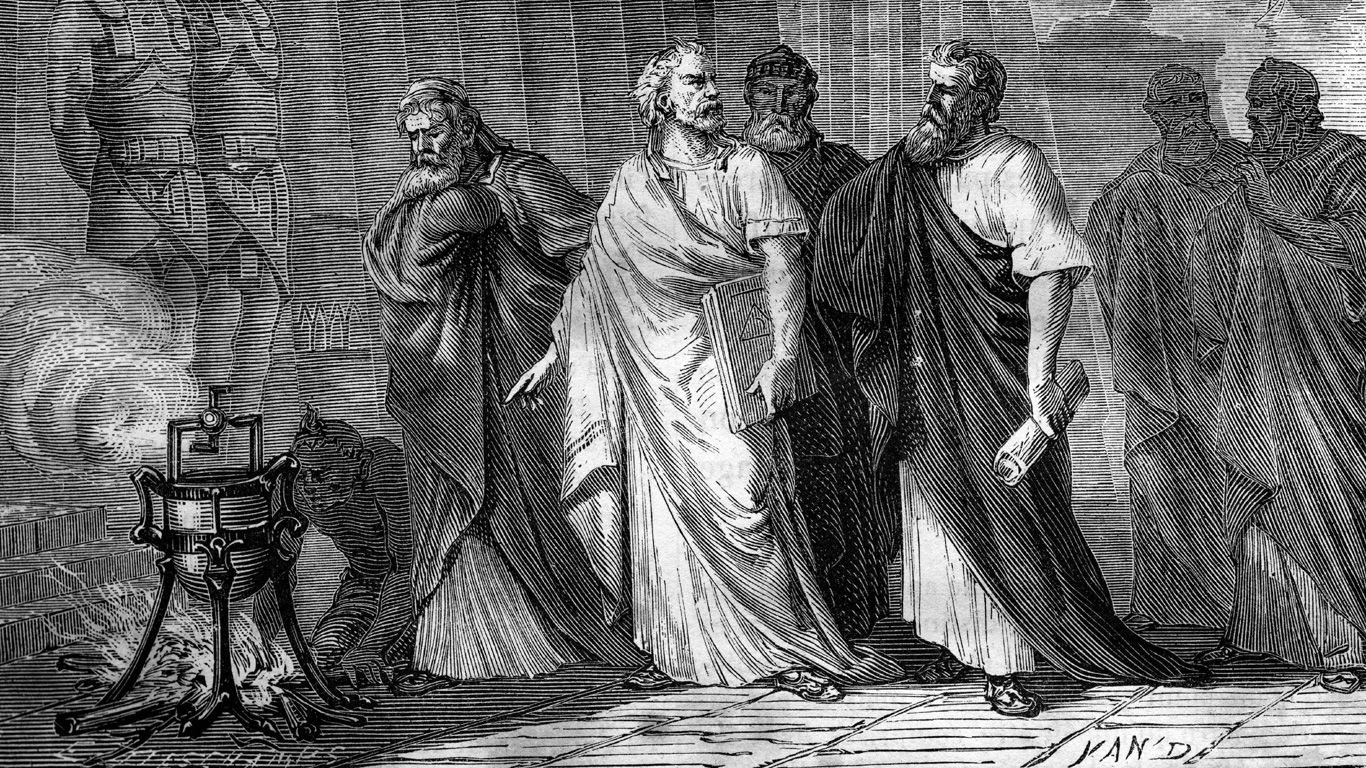
</div>

Vi beskriver nå metoden og skal deretter programmere den

1. Velg ett tall $a>0$ vi skal bestemme $\sqrt{a}$ til.
2. Velg ett tall $x_0 >0$ som vi kaller startverdi (jo nærmere startverdien er til $\sqrt{a}$ jo bedre)
3. Regn ut tallet $$b = \frac{1}{2}\left(x_0 +\frac{a}{x_0}\right)$$
4. Gjenta punkt 2 med ny startverdi $x_0=b$ til du får et tall som er så nøyaktig du ønsker

In [ ]:
#Vi programmerer Herons metode for å finne kvadratrøtter
#programmet trenger:      Et tall a > 0 (den vi skal finne startverdi til)
#                         Andre ting??
